Data source notes: The data for this notebook was downloaded from: http://data-boulder.opendata.arcgis.com/datasets/fa19e19360e74c15a5ebe8b65cf523ad_0/data on 4/21/2019. I Downloaded the csv format to my computer. Save the data file in the same location that you open your notebook. The following is information included on the download site...

*This feature class is made up of the crimes the crime analyst determines to be “target crimes”. These crimes have been moved from their exact location to either a block address, an intersection or City of Boulder Police Head Quarters (if the exact location of where the crime occurred).*

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# Read in the text document and view the first five rows
crime = pd.read_table('CrimeLocations.csv',sep=',')
crime.head()

,X,Y,OBJECTID,REPORTNUM,REPORTDATE,BLOCKADD,OFFENSE
0,-105.272694,40.036411,15317027,100005879,2010-05-10T07:00:00.000Z,19th St & Iris Ave,Vandalism
1,-105.255116,40.032824,15317028,080016839,2008-12-15T07:00:00.000Z,2900 Block Glenwood Dr,Burglary
2,-105.256249,40.019711,15317029,170003203,2017-03-16T07:00:00.000Z,1900 Block 29th St,Sex Assault
3,-105.278651,40.002780,15317030,120006765,2012-05-19T07:00:00.000Z,800 Block 11th St,Robbery
4,-105.253104,40.004454,15317031,080007937,2008-06-14T07:00:00.000Z,900 Block 30th St,Vandalism


In [33]:
#Count the number of rows and columns.
crime.shape

(33184, 7)

In [34]:
# List out the column headers
list(crime)

['X', 'Y', 'OBJECTID', 'REPORTNUM', 'REPORTDATE', 'BLOCKADD', 'OFFENSE']

In [35]:
# Count the number of null values in each column.
#This can help give you an idea if there are 'holes' in your data.
crime.isnull().sum()

X             0
Y             0
OBJECTID      0
REPORTNUM     0
REPORTDATE    0
BLOCKADD      0
OFFENSE       0
dtype: int64

In [36]:
# Data type for each column.
#You may have to convert your data types before you can add/subtract, do date ranges, etc.
crime.dtypes

X             float64
Y             float64
OBJECTID        int64
REPORTNUM      object
REPORTDATE     object
BLOCKADD       object
OFFENSE        object
dtype: object

In [37]:
# Change the datatype to datetime for REPORTDATE.
#You are then able to look at specific ranges, or count by date.
crime['REPORTDATE'] = crime['REPORTDATE'].astype('datetime64[ns]')

In [38]:
# Count the number of unique values in each column
crime.apply(lambda x: len(x.unique()))

X              3851
Y              3851
OBJECTID      33184
REPORTNUM     33184
REPORTDATE     4120
BLOCKADD       3761
OFFENSE          15
dtype: int64

In [39]:
# There are only 15 unique Offense types! What are they?
crime['OFFENSE'].unique()

array(['Vandalism', 'Burglary', 'Sex Assault', 'Robbery', 'Incident',
       'Trespassing', 'Theft From Vehicle', 'Assault', 'Auto Theft',
       'Indecent Exposure', 'Theft Of Car Parts', 'Motorcycle Theft',
       'Recovery', 'Indecency', 'Homicide'], dtype=object)

This is where I'd go back to the website to understand more about the data. What information do they give us? I don't see drug offenses included.

In checking the data source website, I do not see information as to why drug offenses are not included, but an interesting follow-up question.

In [40]:
# What date range is included in the data?
print(crime['REPORTDATE'].min())
print(crime['REPORTDATE'].max())

2008-01-01 07:00:00
2019-04-19 07:00:00


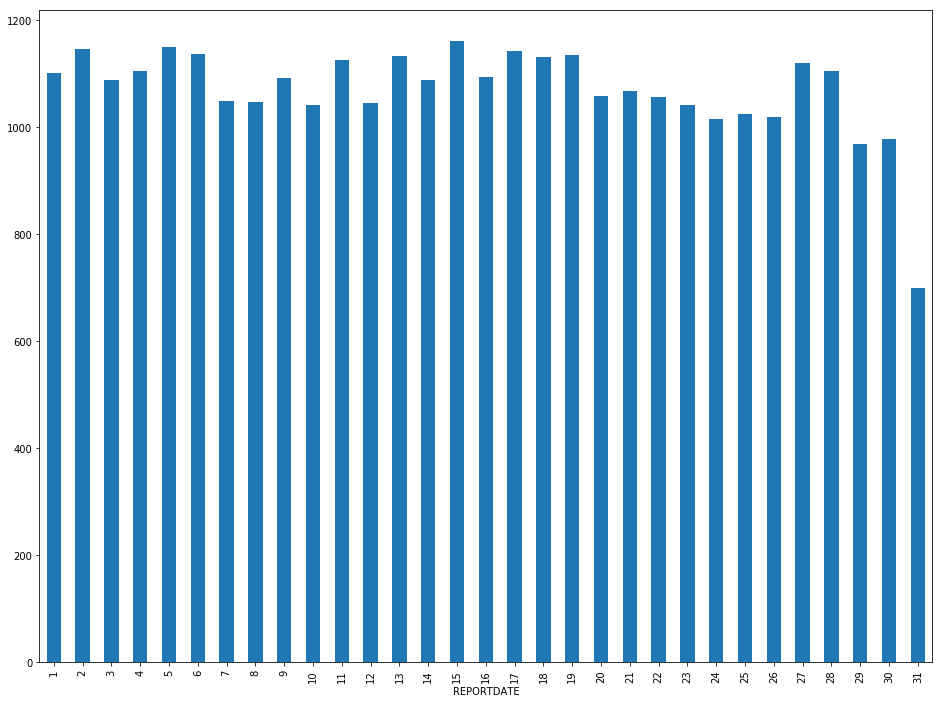

In [41]:
# Is there a pattern for when crimes are reported throughout a month? Group by Date.
#The 31st is most likely a lower number because there are fewer.
crime['REPORTDATE'].groupby(crime['REPORTDATE'].dt.day).count().plot(kind="bar")
plt.show()

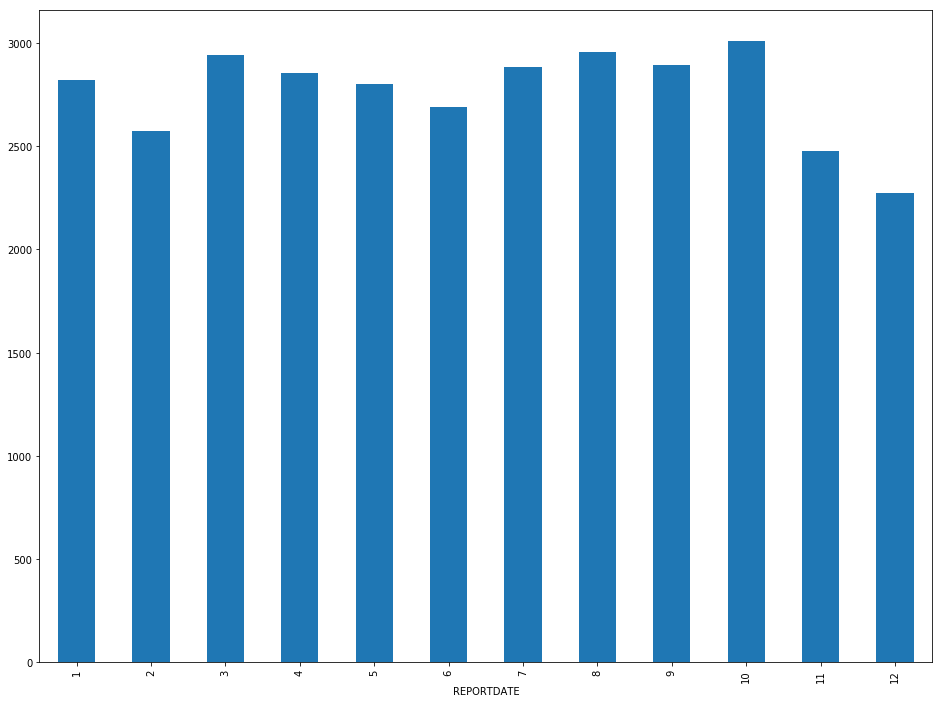

In [42]:
# Are there certain months that see higher crime? Group by Month.
crime['REPORTDATE'].groupby(crime['REPORTDATE'].dt.month).count().plot(kind="bar")
plt.show()

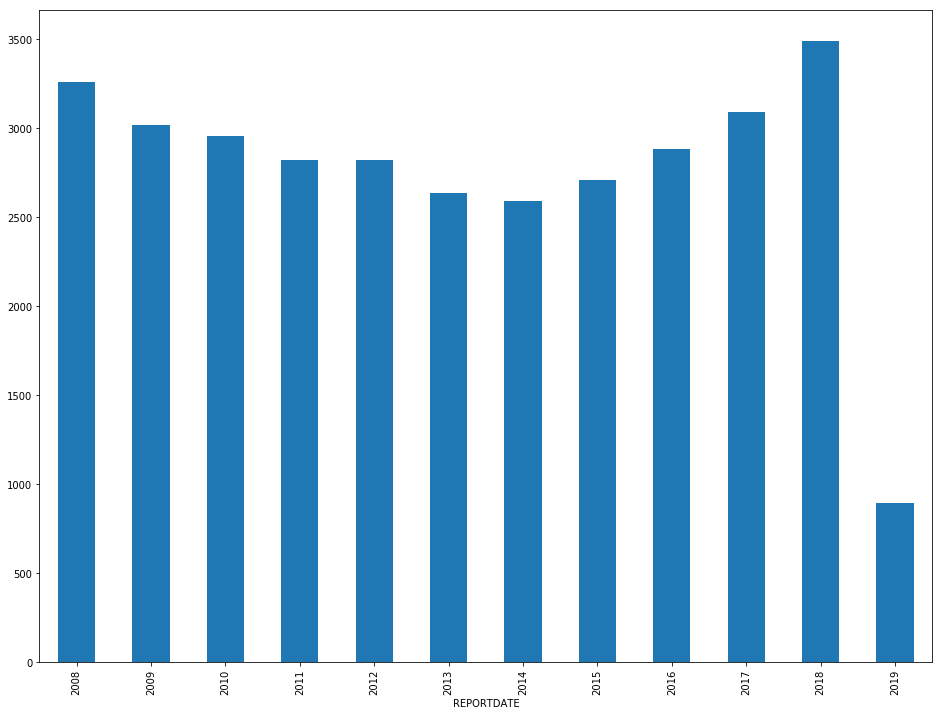

In [43]:
# How many crimes were reported each year?
crime['REPORTDATE'].groupby(crime['REPORTDATE'].dt.year).count().plot(kind="bar")
plt.show()

Current size: [16.0, 12.0]


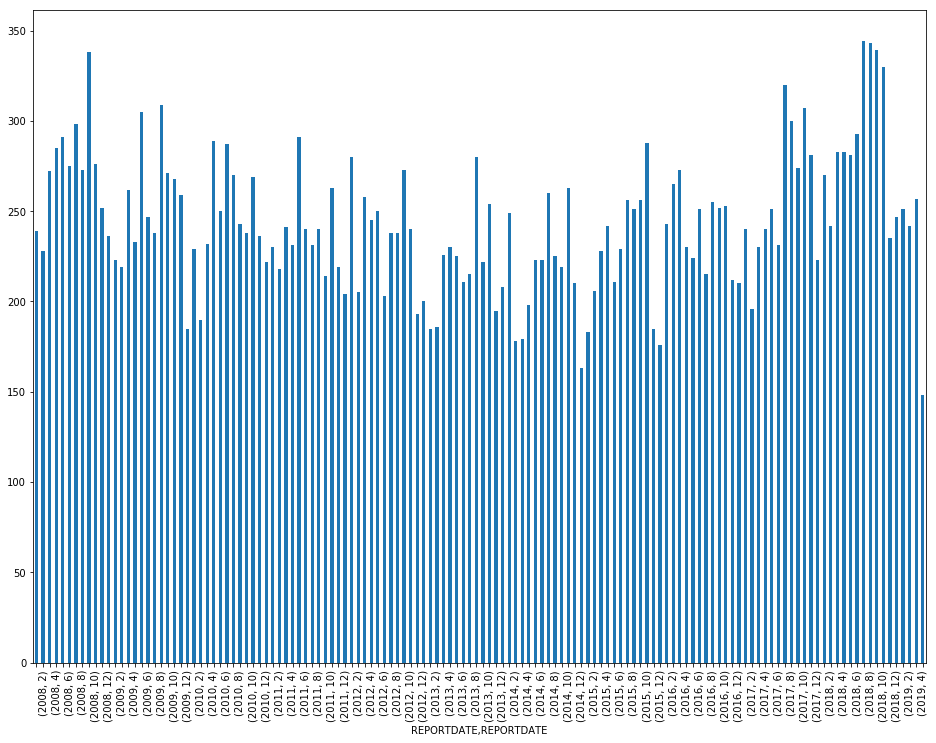

In [44]:
# Show the number of crimes committed each month of each year.
cbar = crime['REPORTDATE'].groupby([crime['REPORTDATE'].dt.year, crime['REPORTDATE'].dt.month]).count().plot(kind="bar")

for label in cbar.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)

# Set figure width to 8 and height to 6
fig_size[0] = 16
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

plt.show()

In [45]:
# The graph can show patterns, but can also be a lot to look at.
#Show the counts of number of crimes per month, per year.
counts = crime['REPORTDATE'].groupby([crime['REPORTDATE'].dt.year, crime['REPORTDATE'].dt.month]).count()
counts

REPORTDATE  REPORTDATE
2008        1             239
            2             228
            3             272
            4             285
            5             291
            6             275
            7             298
            8             273
            9             338
            10            276
            11            252
            12            236
2009        1             223
            2             219
            3             262
            4             233
            5             305
            6             247
            7             238
            8             309
            9             271
            10            268
            11            259
            12            185
2010        1             229
            2             190
            3             232
            4             289
            5             250
            6             287
                         ... 
2016        11            212
            12   

In [51]:
# Look at numbers for types of crimes committed.
offenses = crime.OFFENSE.value_counts()
offenses

Vandalism             9117
Burglary              6099
Theft From Vehicle    5297
Trespassing           5090
Incident              2381
Auto Theft            1376
Assault               1247
Sex Assault           1027
Robbery                448
Indecent Exposure      284
Motorcycle Theft       279
Recovery               252
Theft Of Car Parts     225
Indecency               42
Homicide                20
Name: OFFENSE, dtype: int64

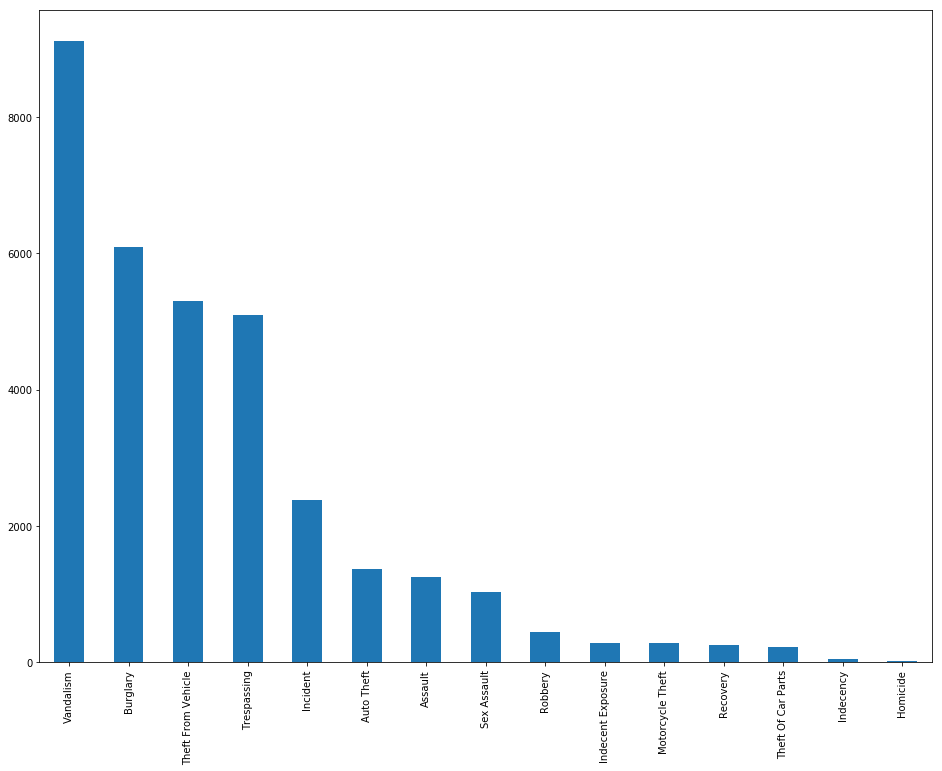

In [53]:
# Now to visualize the numbers
crime.OFFENSE.value_counts().plot(kind = 'bar')
plt.show()

Now that we've done some "exploratory" analysis we have a better idea of what the can tell us and what it cannot. One piece that we haven't explored is location. Mapping in Python may take longer if you are very new programming. One great resource that has made the task easy is Tableau. I will create a separate tutorial in Tableau to help us create a map.

What other questions do you have for the data?

The following two notebooks in the repository will explore joining data to other files. Joining sources of data can help answer many more questions!